In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras as ks

file_path = "/users/raghavsharma/desktop/data_2.csv" #this is the file which is loan_data2.csv in the zip file.
#I have changed the name of it.

data = pd.read_csv(file_path)

print(data.shape)


(9578, 14)


In [67]:
from sklearn.preprocessing import LabelEncoder #this will convert the categorical values into numerical values

label_encoder = LabelEncoder()

# Apply Label Encoding to the 'purpose' column since it is the only categorical value column
data['purpose_encoded'] = label_encoder.fit_transform(data['purpose'])

print(data)

      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti   fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48  737.0        5639.958333    28854.0        52.1   
1          11.082143  14.29  707.0        2760.

In [24]:
#Performing EDA on the dataset. We have already loaded the data, now we can move forward to the remaining steps

#2) 

# Display basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
 14  purpose_encoded    9578 non-null   int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 1.1+ MB
None
       cre

In [41]:
#3) # Check for missing values
print(data.isnull().sum())

#Handle missing values (if needed)
#data = data.drop('int.rate_impute', axis=0)

#print(data_new)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
purpose_encoded      0
dtype: int64


In [49]:
#In this case, we are using SimpleImputer to fill up the NaN values for better accuracy.
from sklearn.impute import SimpleImputer


# List of columns to impute
columns_to_impute = ['int.rate', 'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 
                     'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

# Create a SimpleImputer instance
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit and transform the selected columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Display the updated DataFrame
print(data)


      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti   fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48  737.0        5639.958333    28854.0        52.1   
1          11.082143  14.29  707.0        2760.

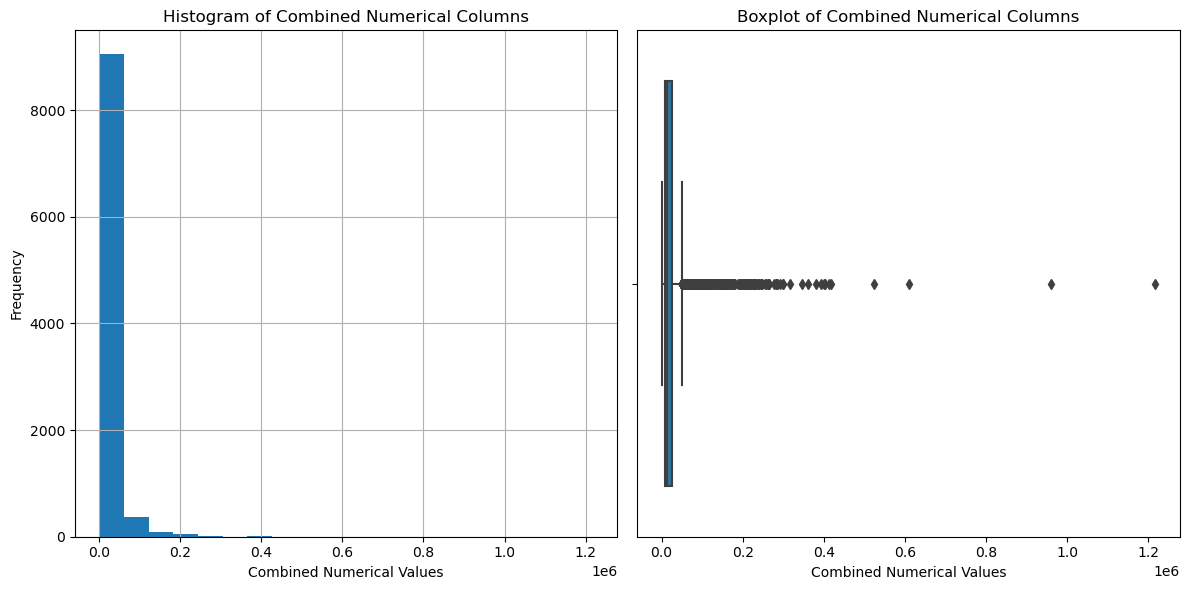

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with numerical columns
# Replace 'Numerical_Column_1', 'Numerical_Column_2', etc., with actual column names

# Select numerical columns
numerical_columns = ['int.rate', 'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 
                     'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

# Combine all numerical columns into a single column
data['Combined_Numerical'] = data[numerical_columns].sum(axis=1)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['Combined_Numerical'].hist(bins=20)
plt.title('Histogram of Combined Numerical Columns')
plt.xlabel('Combined Numerical Values')
plt.ylabel('Frequency')

# Plot boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Combined_Numerical', data=data)
plt.title('Boxplot of Combined Numerical Columns')
plt.xlabel('Combined Numerical Values')

plt.tight_layout()
plt.show()

# Drop the temporary combined column if you don't need it in your DataFrame
data = data.drop('Combined_Numerical', axis=1)


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


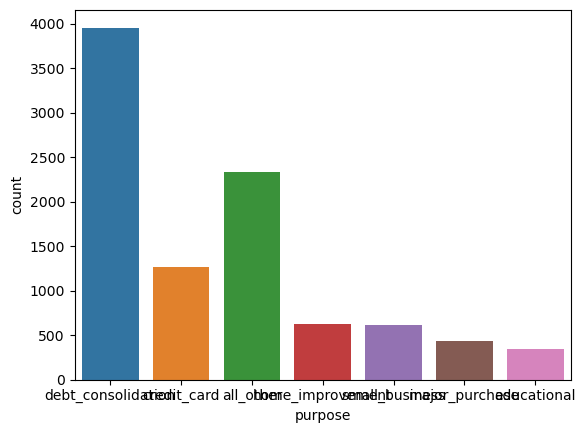

In [53]:
#In this case, purpose is the only categorical column in our dataset

# Display value counts for categorical variables
print(data['purpose'].value_counts())

# Plot the distribution of categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='purpose', data=data)
plt.show()


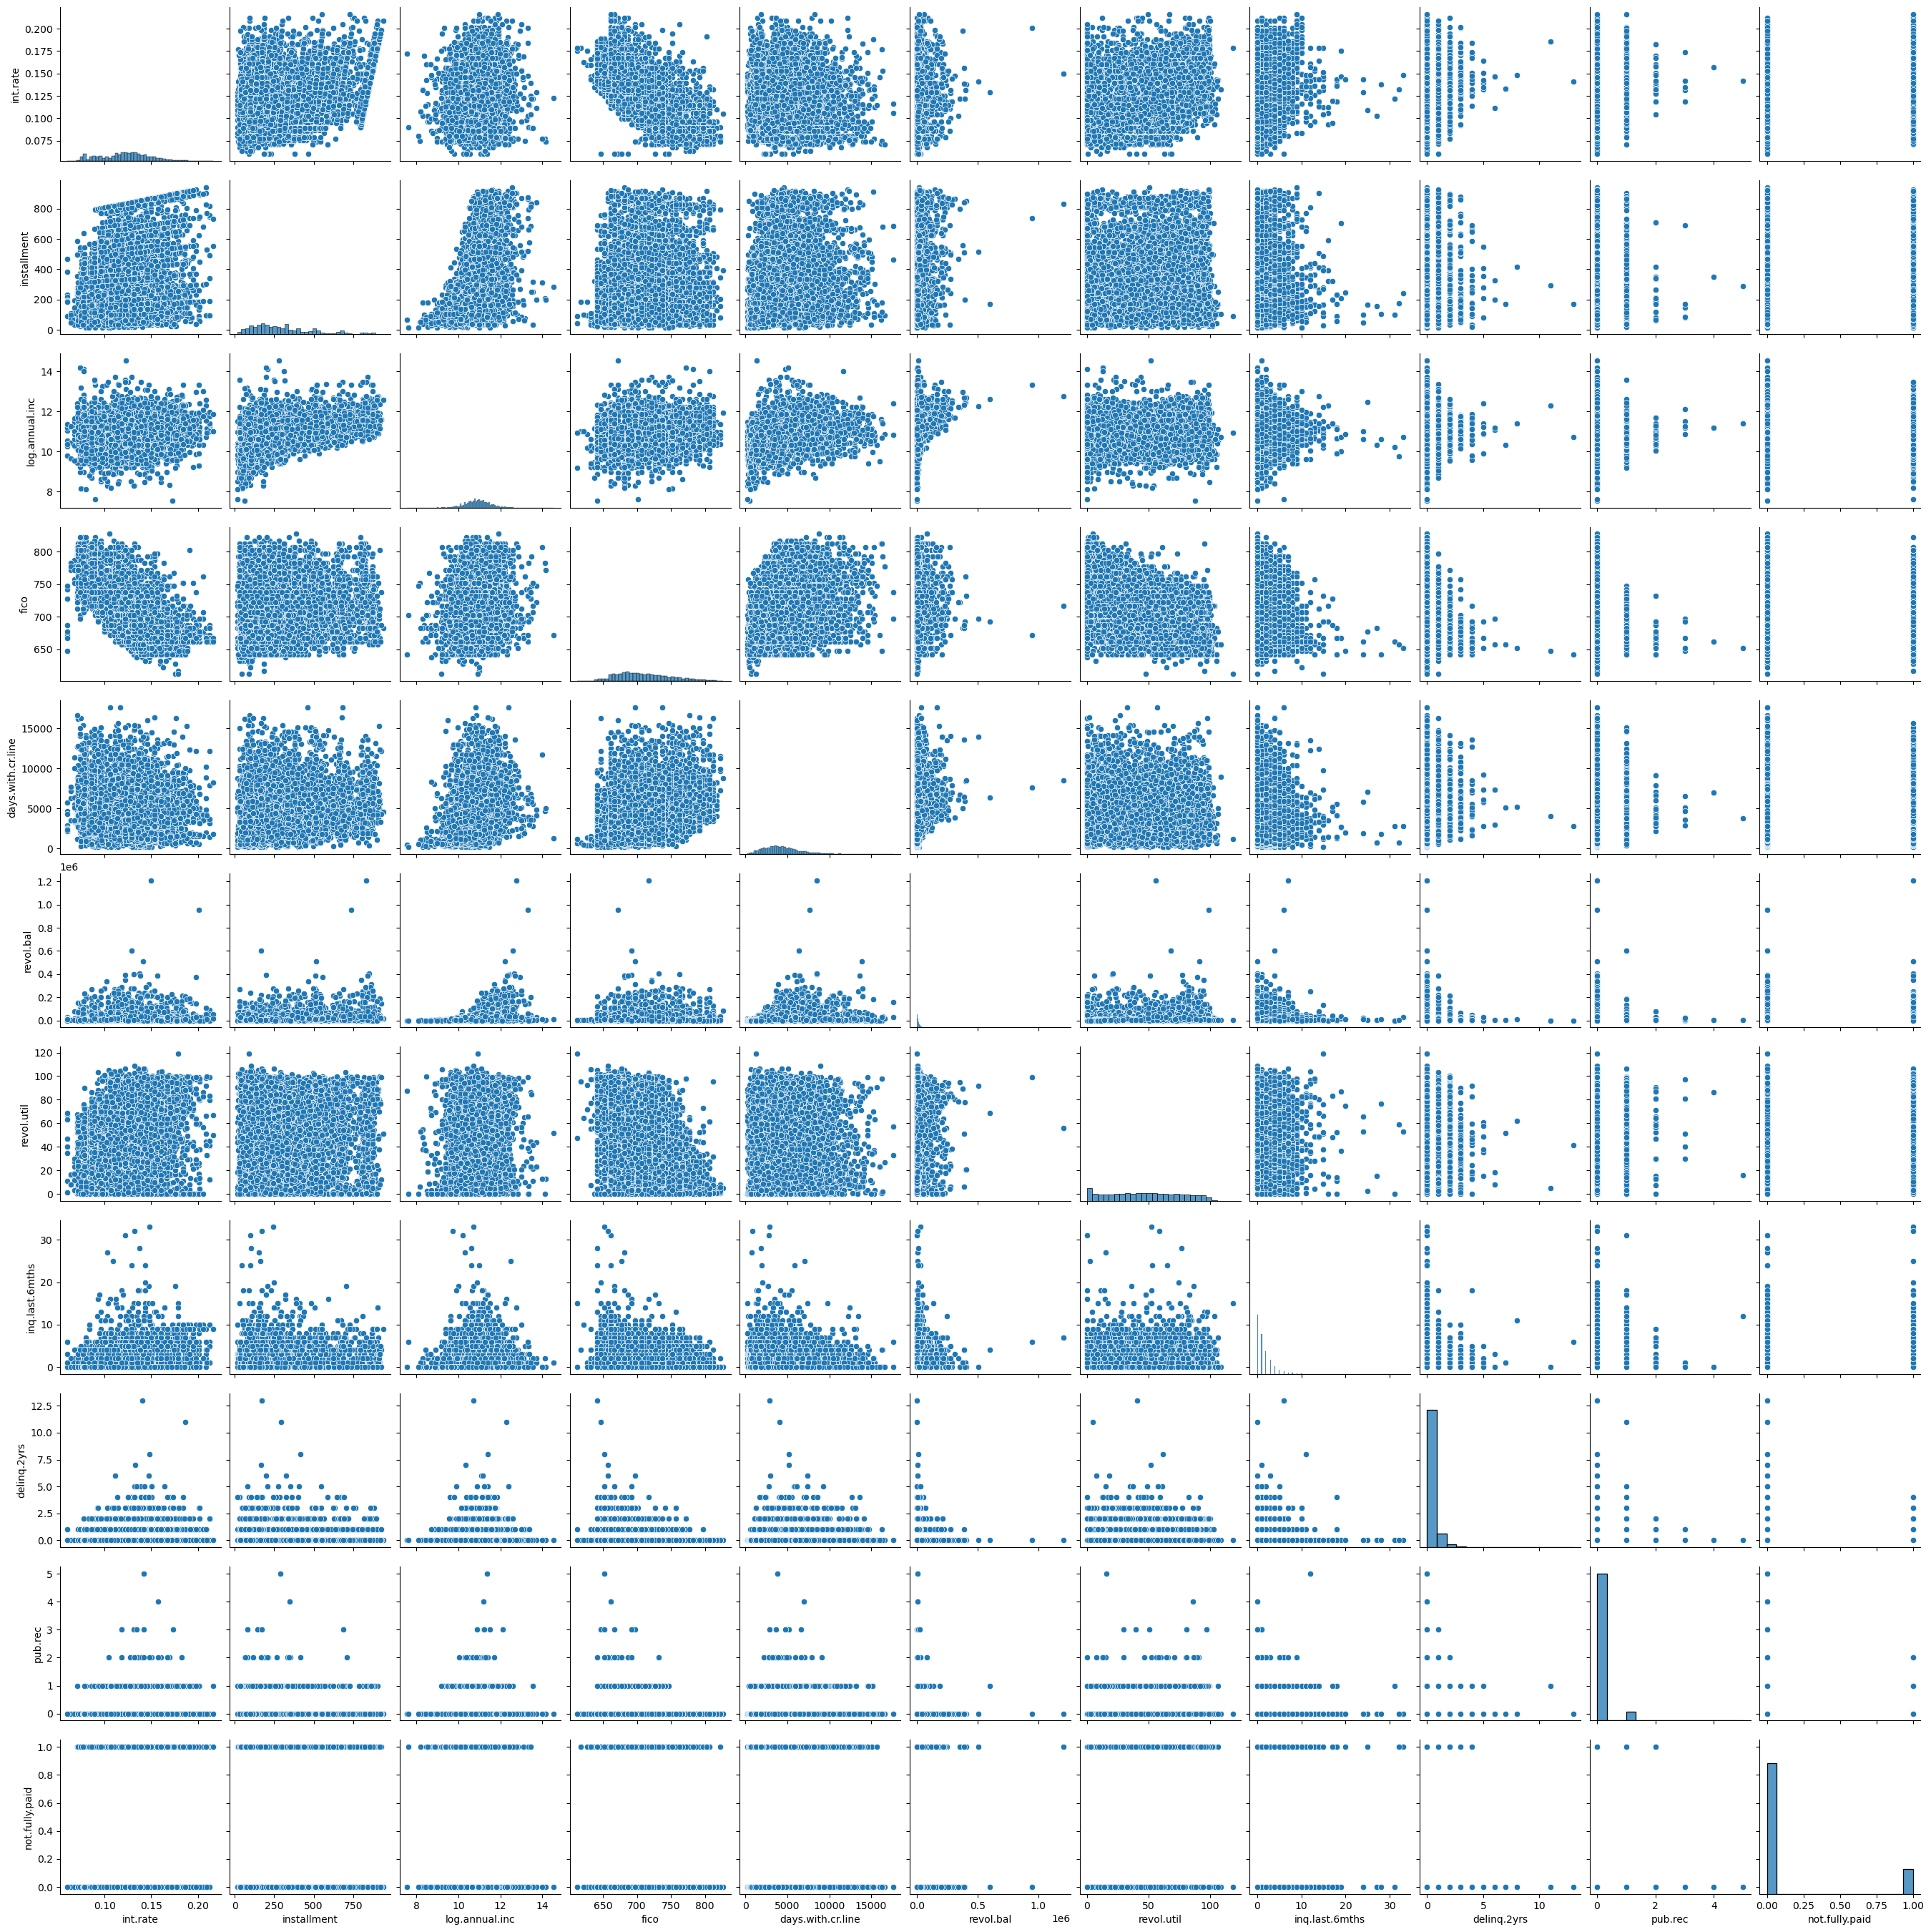

/var/folders/vp/lrl181p11fb_10vhrnl_2v300000gn/T/ipykernel_14609/1504238957.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


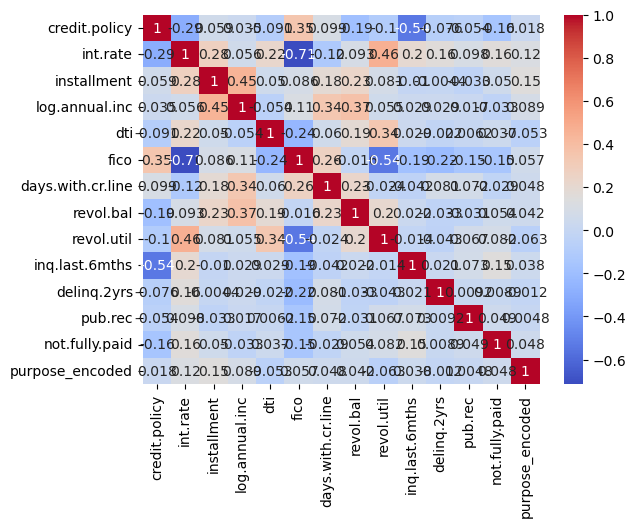

In [54]:
#Relationship between Variables

# Pairplot for numerical variables
sns.pairplot(data[['int.rate', 'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 
                     'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']])
plt.show()

# Correlation heatmap for numerical variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [59]:
# Identify and handle outliers
from scipy.stats import zscore

numerical_columns = ['int.rate', 'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 
                     'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

# Use the list of numerical columns directly
z_scores = zscore(data[numerical_columns])

# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)
outlier_rows = data.index[outliers.any(axis=1)]
print("Outlier Rows:", outlier_rows)

# Handle outliers (if needed)
# data = data[~outliers]



Outlier Rows: Int64Index([   6,   10,   24,   25,   37,   46,   55,   60,   63,   76,
            ...
            9549, 9551, 9552, 9553, 9557, 9564, 9566, 9568, 9571, 9573],
           dtype='int64', length=1296)


In [61]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

/var/folders/vp/lrl181p11fb_10vhrnl_2v300000gn/T/ipykernel_14609/2755335233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [62]:
correlation_threshold = 0.8

# Create a mask for features with strong correlation
strong_correlation_mask = ((correlation_matrix > correlation_threshold) & (correlation_matrix < 1.0)) | ((correlation_matrix < -correlation_threshold) & (correlation_matrix > -1.0))

# Drop features with strong correlation
features_to_drop = [column for column in strong_correlation_mask.columns if any(strong_correlation_mask[column])]
data_dropped = data.drop(features_to_drop, axis=1)

# Display the updated DataFrame
print("Original Data Shape:", data.shape)
print("Data After Dropping Features with Strong Correlation Shape:", data_dropped.shape)

Original Data Shape: (9578, 15)
Data After Dropping Features with Strong Correlation Shape: (9578, 15)


In [81]:
#The deep learning model using Keras and TensorFlow as backend.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE


X = data.drop('not.fully.paid', axis=1) #the feature variables
y = data['not.fully.paid'] #the target variable

#print(y.shape)
#print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalanced classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Build the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)

# Predict probabilities using the trained model
y_probabilities = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_probabilities > 0.5).astype(int)

# Display classification report or other evaluation metrics
print(classification_report(y_test, y_pred))



Epoch 1/10
322/322 [==============================] - 0s 482us/step - loss: 46.5862 - accuracy: 0.5326 - val_loss: 20.6843 - val_accuracy: 0.7393
Epoch 2/10
322/322 [==============================] - 0s 361us/step - loss: 30.5618 - accuracy: 0.5472 - val_loss: 1.6378 - val_accuracy: 0.9406
Epoch 3/10
322/322 [==============================] - 0s 359us/step - loss: 34.1221 - accuracy: 0.5532 - val_loss: 7.9500 - val_accuracy: 0.4464
Epoch 4/10
322/322 [==============================] - 0s 358us/step - loss: 21.9178 - accuracy: 0.5490 - val_loss: 30.5572 - val_accuracy: 0.0874
Epoch 5/10
322/322 [==============================] - 0s 358us/step - loss: 31.3060 - accuracy: 0.5505 - val_loss: 72.6474 - val_accuracy: 0.0194
Epoch 6/10
322/322 [==============================] - 0s 356us/step - loss: 26.1347 - accuracy: 0.5453 - val_loss: 35.1936 - val_accuracy: 0.0350
Epoch 7/10
322/322 [==============================] - 0s 353us/step - loss: 24.5509 - accuracy: 0.5475 - val_loss: 159.5993 - 